# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions`

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
# import necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

In [2]:
# !pip install plotly
# !pip install cufflinks
# !pip install chart_studio

> Let's set some print option.

In [3]:
# set styles
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy positions by setting `fmt` (format string) at `g^`, and your sell positions by setting fmt at `rv`.

### Below are the lines of code that lead to an answer:

In [4]:
# Import GOOGL data
GOOGL = pdr.get_data_yahoo("GOOGL",     # ticker name
                            start = dt.datetime(2011, 8, 1),  # start date
                            end = dt.datetime(2020, 7, 31)    # end date
                            ).dropna()  # .dropna() for droping Nan values
                            
GOOGL  # show GOOGL data

High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2011-08-01  15.402903  14.994494  15.295796  15.184434  158485356.0  15.184434
2011-08-02  15.257007  14.804054  15.165165  14.824825  127895976.0  14.824825
2011-08-03  15.090090  14.605355  14.871622  15.044294  152874972.0  15.044294
2011-08-04  14.986236  14.451201  14.877377  14.452452  196387416.0  14.452452
2011-08-05  14.764765  14.064064  14.578078  14.490490  236926836.0  14.490490
...               ...        ...        ...        ...          ...        ...
2020-07-27  76.877998  75.616501  75.663002  76.471497   27124000.0  76.471497
2020-07-28  76.300499  75.026001  76.250000  75.182503   30910000.0  75.182503
2020-07-29  76.666496  75.150497  75.250000  76.175499   22676000.0  76.175499
2020-07-30  77.044502  74.758499  74.898499  76.918503   36042000.0  76.918503
2020-07-31  75.250999  72.699997  74.852501  74.397499   91468000.0  74.397499

[2266 rows x 6 columns]

In [5]:
# use `yfinance` to download data
# GOOGL1 = yf.download("GOOGL",
#                      "2011-08-01",
#                      "2020-07-31",
#                       auto_adjust=True)

# GOOGL1

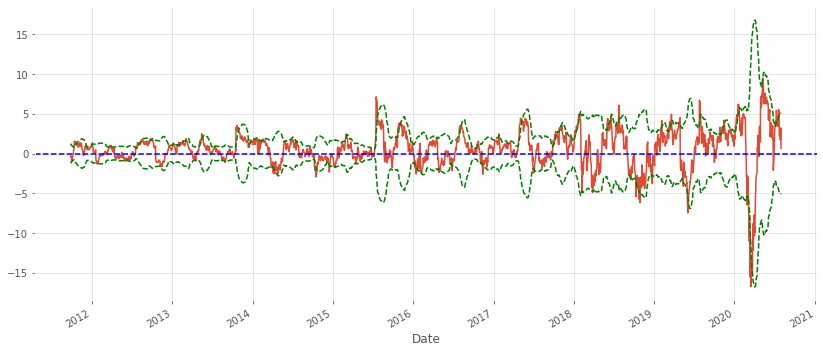

In [6]:
# Generate log return
GOOGL["Return"] = np.log(GOOGL["Close"] / GOOGL["Close"].shift(1)
                      )

# SMA (window = 42)
GOOGL["SMA_42"] = GOOGL["Adj Close"].rolling(window = 42).mean()

# Upper(Positive) threshold value 
# 2 times rolling window std
GOOGL["Moving_T"] = 2 * GOOGL["Adj Close"].rolling(window = 42).std()

# Define the distance between adjust close price and moving average
GOOGL["DIST"] = GOOGL["Adj Close"] - GOOGL["SMA_42"]

# plotting
GOOGL["DIST"].dropna().plot(figsize = (14, 6)
                        )
                        
GOOGL["Moving_T"].dropna().plot(style = '--',
                                color = 'green'
                                )

# lower threshold value
(-GOOGL["Moving_T"]).dropna().plot(style = '--',
                                color = 'green'
                                )

plt.axhline(0, color = "blue", ls = "--")

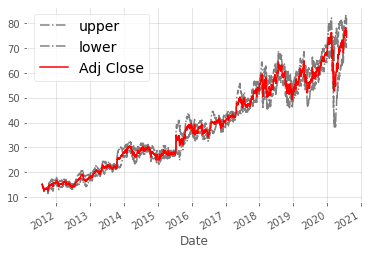

In [7]:
# plot the upper and lower bound

# set those bounds
GOOGL["upper"] = GOOGL["Adj Close"] + GOOGL["Moving_T"]
GOOGL["lower"] = GOOGL["Adj Close"] -  GOOGL.Moving_T       # use .columns_name to slice

# upper and lower bound
GOOGL[["upper","lower"]].dropna().plot(color = 'grey',
                                        style = '-.')
# SMA
#GOOGL["SMA_42"].dropna().plot(figsize = (16,8),
                                        # color = 'green',
                                        # style = '--',
                                        # label = 'SMA_42')
# real price
GOOGL["Adj Close"].dropna().plot(color = 'r',
                                label = 'Adj Close')

plt.legend()
plt.show()

In [8]:
# Find some special signal points
# above the upper threshold value
# set value -1 to represent 'sell position'
GOOGL['POS'] = np.where(GOOGL["DIST"] > GOOGL["Moving_T"],
                    -1, np.nan)

# below the lower threshold value
# set value 1 to represent 'buy position'
GOOGL["POS"] = np.where(GOOGL["DIST"] < (-GOOGL["Moving_T"]),
                    1, GOOGL["POS"]
                    )

# cross the `DIST=0` line
# back to mean value
GOOGL["POS"] = np.where(GOOGL["DIST"] * GOOGL["DIST"].shift(1) < 0,
                    0, GOOGL["POS"]
                    )


### <font color = red> Answer 1 is presented in the cell below: </font>

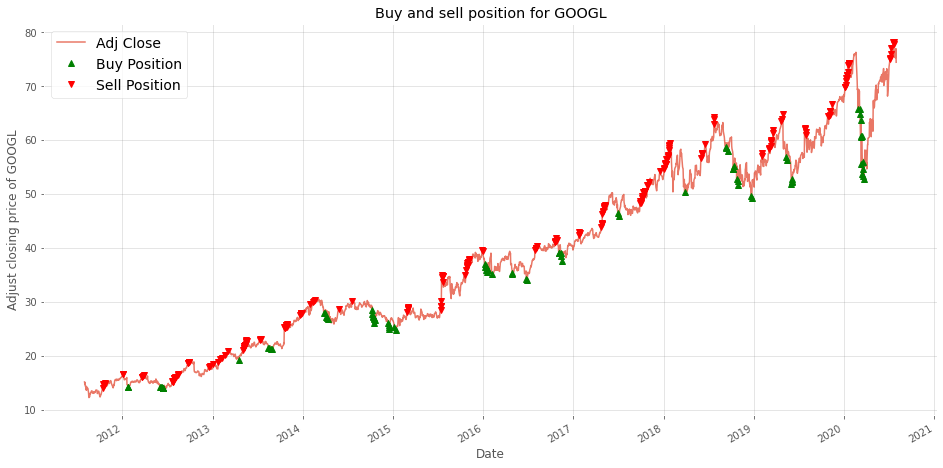

In [9]:
# plot the real adjust close price of GOOGL
GOOGL["Adj Close"].dropna().plot(figsize = (16, 8),
                        alpha = 3/4,
                        label = 'Adj Close'
                        )

# plot all 'buy position'
plt.plot(GOOGL[GOOGL['POS']>0].index, 
            GOOGL[GOOGL['POS']>0]['Adj Close'],
            'g^',
            label = 'Buy Position'
            )

# plot all 'sell position'
plt.plot(GOOGL[GOOGL['POS']<0].index, 
            GOOGL[GOOGL['POS']<0]['Adj Close'],
            'rv',
            label = 'Sell Position'
            )

plt.ylabel("Adjust closing price of GOOGL")
plt.legend()
plt.title("Buy and sell position for GOOGL")
plt.show()


In [10]:
import cufflinks as cf

In [11]:
# qf=cf.QuantFig(GOOGL,title='Google Quant Figure',legend='top',name='GS') # can add rangeslider=True

# qf.add_bollinger_bands(periods=42,boll_std=2,colors='blue',fill=False, column = "Adj Close")
# qf.add_sma(42,width=2,color='red',legendgroup=True)
# #qf.add_rsi(periods=42,color='blue', column = "Adj Close")
# #qf.add_volume()

# qf.iplot(up_color='green', down_color='red')

In [12]:
# prepare for following questions
# .ffill() for filling forward: define the holding position contiusly back to mean return all the time
# .fillna(0) for filling Nan as 0, if position is Nan, so let the position become 'not holding'
GOOGL["POS"] = GOOGL["POS"].ffill().fillna(0)

In [13]:
toy = pd.Series([1,np.nan,-1,np.nan])
print(toy);print(toy.ffill())

0    1.0
1    NaN
2   -1.0
3    NaN
dtype: float64
0    1.0
1    1.0
2   -1.0
3   -1.0
dtype: float64


![ffill.jpg](ffill.jpg)

# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions`

### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

In [14]:
# Import data
AAPL = pdr.get_data_yahoo("AAPL",
                        start = dt.datetime(2011, 8, 1),
                        end = dt.datetime(2020, 7, 31)
                        ).dropna()

AMZN = pdr.get_data_yahoo("AMZN",
                        start = dt.datetime(2011, 8, 1),
                        end = dt.datetime(2020, 7, 31)
                        ).dropna()

print("--------------------------------------------------------------------")
print("AAPL")
print("--------------------------------------------------------------------")
print(AAPL.head())
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print('AMZN')
print("--------------------------------------------------------------------")
print(AMZN.head())
print("--------------------------------------------------------------------")

--------------------------------------------------------------------
AAPL
--------------------------------------------------------------------
                 High        Low       Open      Close        Volume  \
Date                                                                   
2011-08-01  14.267857  14.013214  14.206429  14.169643  6.128360e+08   
2011-08-02  14.210714  13.869643  14.201786  13.889643  6.395396e+08   
2011-08-03  14.055357  13.651429  13.963571  14.020357  7.325080e+08   
2011-08-04  13.975714  13.476786  13.907500  13.477500  8.714076e+08   
2011-08-05  13.696429  12.948929  13.587143  13.343571  1.204591e+09   

            Adj Close  
Date                   
2011-08-01  12.078459  
2011-08-02  11.839779  
2011-08-03  11.951204  
2011-08-04  11.488461  
2011-08-05  11.374300  
--------------------------------------------------------------------
--------------------------------------------------------------------
AMZN
-----------------------------------------

## Plotting with `plotly.graph_objs`

In [15]:
# plot the closing price
# use `go`---`plotly.graph_objs`
# in class, we learn that `go` can help us with financial plotting
import plotly.graph_objs as go

In [16]:
# we present two examples here
# 1. Candle 
Candle_AAPL = [go.Candlestick(x = AAPL.index,
                     open = AAPL.Open,
                     high = AAPL.High,
                     low = AAPL.Low,
                     close = AAPL.Close)]

# use `go.Figure()` to creat a candle stick plotting using parameters in Candle_AAPL
fig = go.Figure(Candle_AAPL)

# add figure title and y_axis_title
fig.update_layout(
    title='AAPL',
    yaxis_title='Stock Price'
    )

fig.show()

In [17]:
# 2. Plot AAPL and AMZN together
updatemenus = list([
    dict(active = -1,
         buttons = list([
             dict(label = "AAPL",
                  method = "update",
                  args = [{"visible": [True, False]},
                          {"title": "AAPL"}]),
             dict(label = "AMZN",
                  method = "update",
                  args = [{"visible": [False, True]},
                          {"title": "AMZN"}]),
             dict(label = "AAPL & AMZN",
                  method = "update",
                  args = [{"visible": [True, True]},
                          {"title": "AAPL & AMZN"}]),             
         ]),
        )
])

# together = [go.Scatter(x = AAPL.index, y = AAPL.Close.pct_change() , name = "AAPL"),
#             go.Scatter(x = AMZN.index, y = AMZN.Close.pct_change() , name = "AMZN")
#             ]

together = [go.Scatter(x = AAPL.index, y = AAPL.Close/AAPL.Close[0] , name = "AAPL"),
            go.Scatter(x = AMZN.index, y = AMZN.Close/AMZN.Close[0] , name = "AMZN")
            ]

LAYOUT_Better_Comparison = dict(title = "Plot together", showlegend = True, updatemenus = updatemenus)

F_Better_Comparison = dict(data = together, layout = LAYOUT_Better_Comparison)

go.Figure(F_Better_Comparison)

In [18]:
def mean_reverse(df,sma_len):
    '''
    `mean_reverse` function can help with applying mean-reversion strategy with moving threshold value.
    Two parameters are needed in this function, including dataframe and length of rolling windows.
    The threshold value is two times standard deviation of rolling windows.
    '''

    # Simple Moving Average
    # use the 'sma_len' input as the length of rolling windows
    df['SMA'] = df['Adj Close'].rolling(window = sma_len).mean()

    # calculate the log return
    df['RETURNS'] = np.log(df["Adj Close"] / df["Adj Close"].shift(1)
                      )
    
    # upper bound
    df["Moving_T"] = 2 * df["Adj Close"].rolling(window = sma_len).std()

    # lower bound
    df["Negative_Moving_T"] = - df["Moving_T"]
    
    # drop Nan
    df.dropna(inplace = True)
    
    # distance 
    df["DIST"] = df["Adj Close"] - df["SMA"]

    # (same idea in Question1)
    # set sell position
    df['POS'] = np.where(df["DIST"] > df["Moving_T"],
                        -1, np.nan)
    # set buy position
    df["POS"] = np.where(df["DIST"] < df["Negative_Moving_T"],
                        1, df["POS"]
                        )
    # back to mean return
    df["POS"] = np.where(df["DIST"] * df["DIST"].shift(1) < 0,
                        0, df["POS"]
                        )

    # Plotting
    # plotting the real adjust close price
    df["Adj Close"].dropna().plot(figsize = (16, 8),
                            alpha = 3/4,
                            label = 'Adj Close'
                            )

    # buy position
    plt.plot(df[df['POS']>0].index, 
                df[df['POS']>0]['Adj Close'],
                'g^',
                label = 'Buy Position'
                )

    # sell position
    plt.plot(df[df['POS']<0].index, 
                df[df['POS']<0]['Adj Close'],
                'rv',
                label = 'Sell Position'
                )
    
    plt.ylabel("Adjust closing price")
    plt.legend()
    plt.title("Buy and sell position")
    plt.show()

    # fill values
    df["POS"] = df["POS"].ffill()
    df["POS"] = df['POS'].fillna(0)

    # calculate the strategy return
    # strategy return = holding position * return
    df["STRATEGY"] = df["POS"].shift(1) * df["RETURNS"]
    
    # plot the stock return and strategy return
    df[["RETURNS", "STRATEGY"]
    ].dropna() \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize=(16,9))
    plt.ylabel("Cumulative Return")
    plt.title("Cumulative Return of stock and strategy")

    return df

In [19]:
mean_reverse?

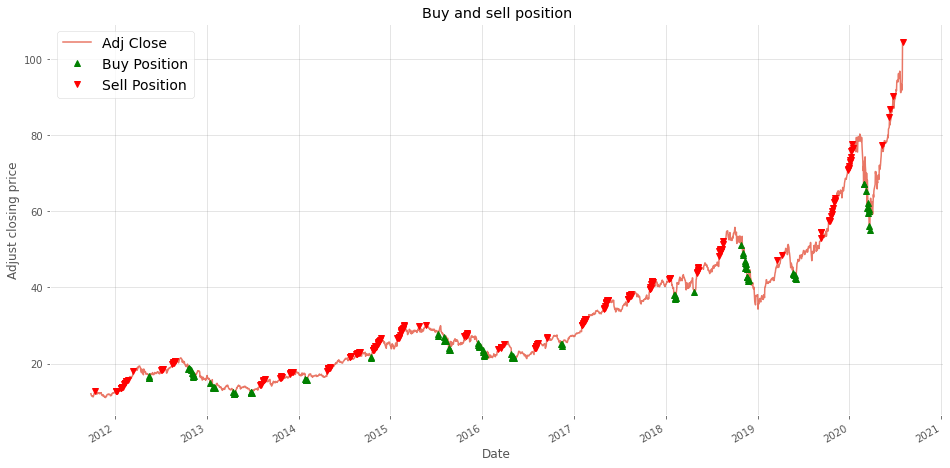

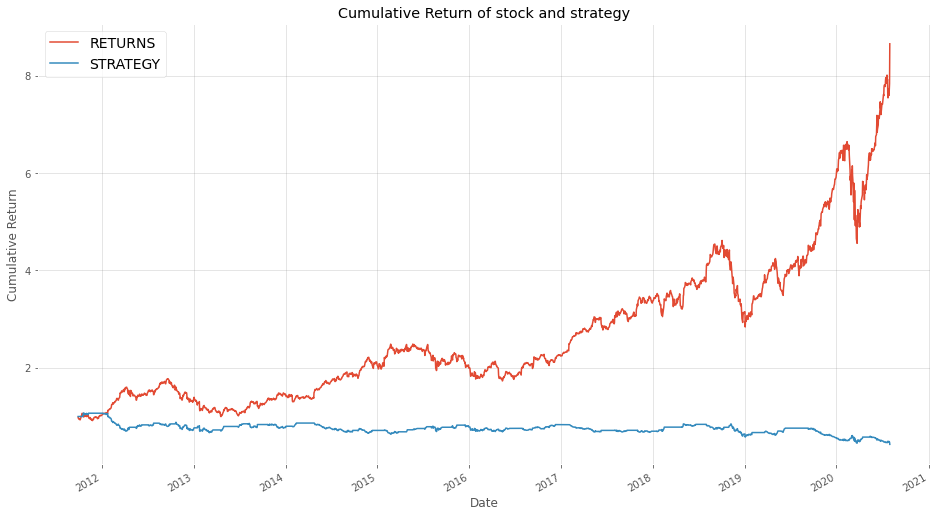

In [20]:
# apply our defined function on AAPL
AAPL =  mean_reverse(AAPL,42) 

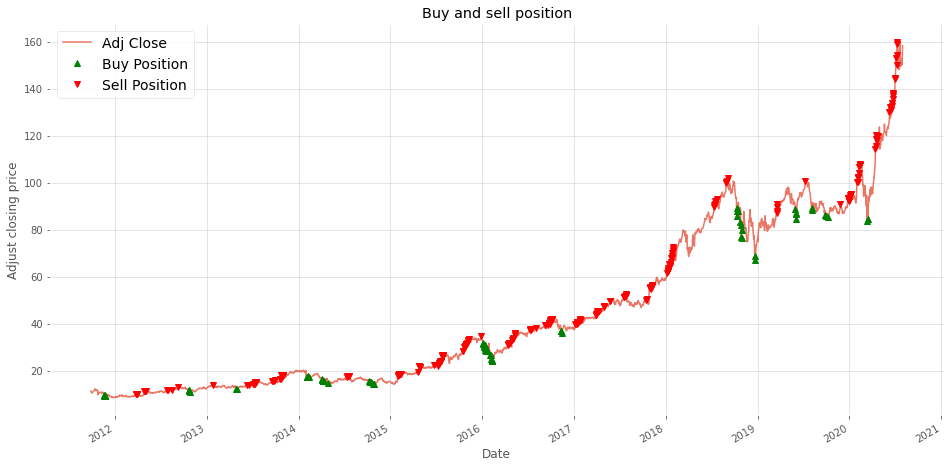

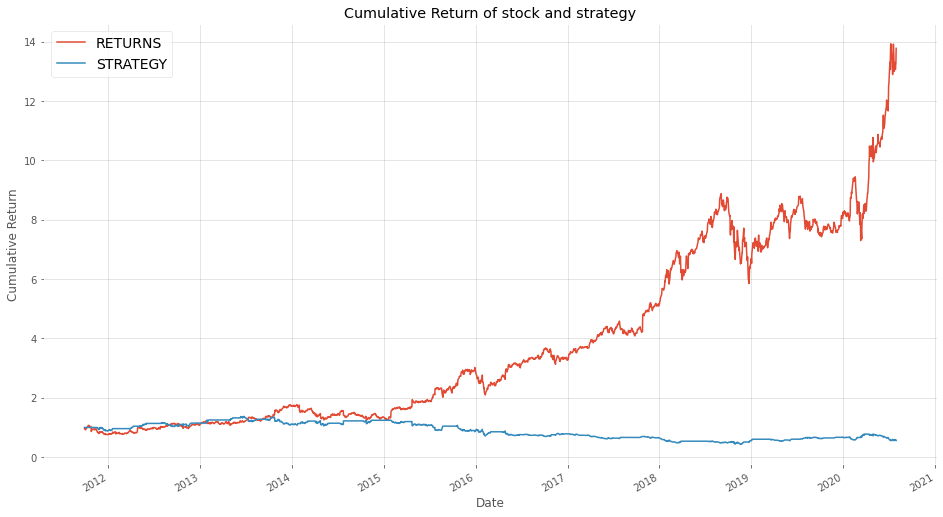

In [21]:
AMZN =  mean_reverse(AMZN,42)

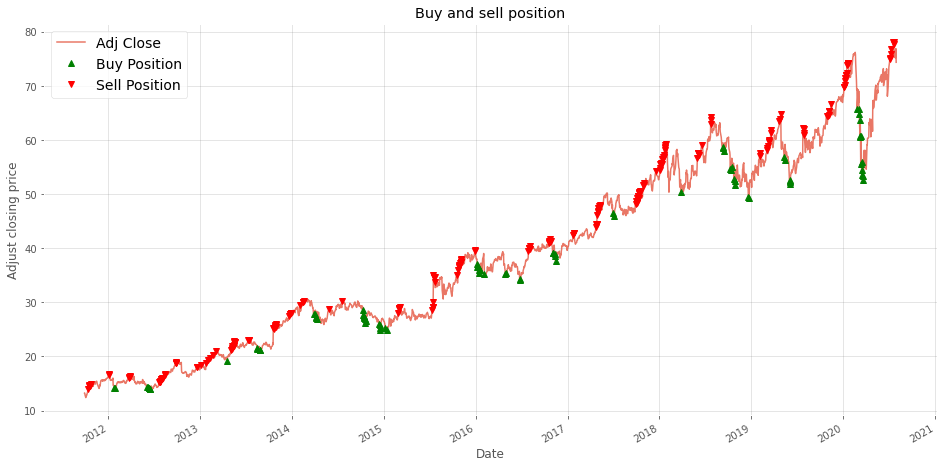

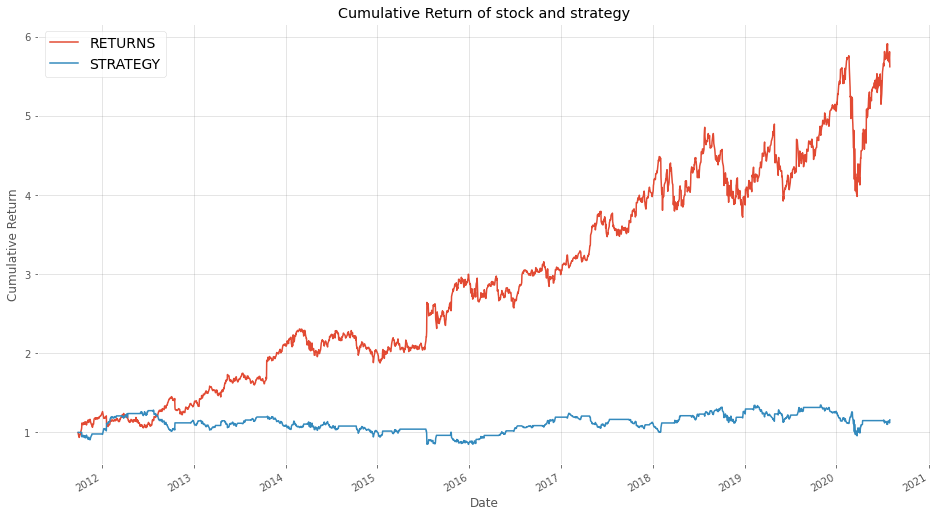

In [22]:
# GOOGL
GOOGL =  mean_reverse(GOOGL,42)

### <font color = red> Answer 2 </font>

    The answer is AMZN.

In [23]:
# Print results of AAPL and AMZN
# convert daily sharpe ration to  annual sharpe ratio   *252**0.5 or np.sqrt(252)
# sharpe ration = (mean_reutrn - risk_free_rate) / standard_deviation
print("The sharpe ratio of AAPL mean reverse startegy is %.4f." %(AAPL["STRATEGY"].dropna().mean()/AAPL["STRATEGY"].dropna().std()* 252**0.5))
print("The sharpe ratio of AMZN mean reverse startegy is %.4f." %(AMZN["STRATEGY"].dropna().mean()/AMZN["STRATEGY"].dropna().std()* 252**0.5))

The sharpe ratio of AAPL mean reverse startegy is -0.4123.
The sharpe ratio of AMZN mean reverse startegy is -0.2789.


### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

In [24]:
# creat an empty list `cum_return_list` to collect all cumulative return
cum_return_list = []

# creat an empty list `final_values` to collect all final values
final_values = []

# use `for ` loop to iteration
# calculate the final value with the inital value at 200,000
for i in [GOOGL, AAPL, AMZN]:
    final_investment_value = i[["STRATEGY"]].dropna().cumsum().apply(np.exp).values[-1] * 200000     # initial_value * cumulative_return = final_value
    #print(float(cum_return))
    cum_return_list.append(float(i[["STRATEGY"]].dropna().cumsum().apply(np.exp).values[-1]))   
    final_values.append(final_investment_value)

### Below are the lines of code that lead to an answer:

In [25]:
# creat a stock name list
stock_name_list = ['GOOGL', 'AAPL', 'AMZN']

# use `for` to print all results with formatting
for i in range(3):
    print("Investment on "+stock_name_list[i]+" has a ending value of %.2f." %final_values[i])   # keep 2 decimal places

Investment on GOOGL has a ending value of 231686.80.
Investment on AAPL has a ending value of 85535.22.
Investment on AMZN has a ending value of 112025.82.


### <font color = red> Answer 3 </font>

    GOOGL : 231686.80
    
    AAPL  : 85535.03
     
    AMZN  : 112025.82
    

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

#### <font color = red> Review the ***Compound Annual Growth Rates***</font>

$$ 
CAGR = (EV/BV)^{1/n} - 1 
$$

In [26]:
# calculate the period of all experimental data range
# print(f"The type of GOOGL.index is {type(GOOGL.index)}.")

# index is a `pandas.core.indexes.datetimes.DatetimeIndex`

# print(f"The type of first element in GOOGL.index is {type(GOOGL.index[0])}.")

# use .days to calculate the distance between two timestamps
D = (GOOGL.index[-1] - GOOGL.index[0]).days
D

3229

***QUESTION***

In [27]:
for i in range(3):
    print("The CAGR of "+ stock_name_list[i] + " is %.4f." %(float((final_values[i] / 200000)**(365/D)-1)))

The CAGR of GOOGL is 0.0168.
The CAGR of AAPL is -0.0915.
The CAGR of AMZN is -0.0634.


### <font color = red> Answer 4 </font>

    GOOGL : 0.0168
    
    AAPL  : -0.0915
     
    AMZN  : -0.0634

## 👇 Questions 5 to 7 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 5. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### <font color = red> ***MOMENTUM STRATEGY***</font>

### Below are the lines of code that lead to an answer:

In [28]:
# S represents the list of tickers' names
S = ["GS", "JPM"]

# define a function `obtain` to collect and format data
def obtain(S, start, end):
    def data(ticker):   # define the function `data` to collet data from Yahoo using pandas_datareader.data.get_data_yahoo()
        return(pdr.get_data_yahoo(ticker,  # ticker name
                                  start = start,    # start date
                                  end = end)    # end date
              )
    OUR_DATA = map(data, S)       # .map()
    return(pd.concat(OUR_DATA,
                     keys = S,
                     names = ["Ticker", "Date"]
                     )
          )

df5 = obtain(S,  # ticker name list
            dt.datetime(2013, 11, 1),    # NOTICE: the input of `start` amd `end` in pdr.get_data_yahoo must be datetime
            dt.datetime(2021, 10, 31)
            )

In [29]:
# take a look of the data
df5 

High         Low        Open       Close      Volume  \
Ticker Date                                                                     
GS     2013-10-31  163.350006  160.860001  162.089996  160.860001   2785000.0   
       2013-11-01  162.600006  160.720001  161.029999  162.050003   2738400.0   
       2013-11-04  163.240005  161.589996  162.419998  163.160004   1711000.0   
       2013-11-05  162.630005  160.779999  161.669998  161.949997   2529400.0   
       2013-11-06  164.300003  162.330002  162.529999  163.520004   3593700.0   
...                       ...         ...         ...         ...         ...   
JPM    2021-10-25  172.960007  170.479996  172.710007  170.940002  10159200.0   
       2021-10-26  172.490005  170.539993  171.000000  171.399994   8015100.0   
       2021-10-27  170.699997  167.339996  170.320007  167.830002   9847000.0   
       2021-10-28  170.509995  167.960007  168.300003  170.360001   7212900.0   
       2021-10-29  172.240005  169.389999  171.179993  169.889999   8140100.0   

                    Adj Close  
Ticker Date                    
GS     2013-10-31  138.151764  
       2013-11-01  139.173752  
       2013-11-04  140.127090  
       2013-11-05  139.087891  
       2013-11-06  140.436264  
...                       ...  
JPM    2021-10-25  165.709686  
       2021-10-26  166.155609  
       2021-10-27  162.694839  
       2021-10-28  165.147430  
       2021-10-29  164.691818  

[4028 rows x 6 columns]

In [30]:
# creat a dataframe named D to collect "Date", "Ticker" and "Adj Close"
D = df5[["Adj Close"]].reset_index().pivot("Date", 
                                           "Ticker",
                                           "Adj Close")
# we use .pivot() here, setting columns become Ticker, the row index becomes Date

# take a look at D
D

Ticker              GS         JPM
Date                              
2013-10-31  138.151764   40.147808
2013-11-01  139.173752   40.903400
2013-11-04  140.127090   40.537289
2013-11-05  139.087891   40.467178
2013-11-06  140.436264   40.584026
...                ...         ...
2021-10-25  404.603790  165.709686
2021-10-26  407.393829  166.155609
2021-10-27  400.935760  162.694839
2021-10-28  404.672119  165.147430
2021-10-29  403.238068  164.691818

[2014 rows x 2 columns]

In [31]:
# After select the Adj Close, we still need to divide data of those two stocks
# GS
GS = pd.DataFrame(D['GS'])      # call a pd.Series and make it a DataFrame
GS.rename(columns = {"GS": "PRICE"},    # change the columns name to 'PRICE'
           inplace = True)      # 'inplace=True' inplace the orginal columns name and save this change

# NOTES: 'inplace = True' to save storage space

# JPM
JPM = pd.DataFrame(D['JPM'])    # same as GS
JPM.rename(columns = {"JPM": "PRICE"},  
           inplace = True)

In [32]:
# calculate log return
GS["RETURNS"] = np.log(GS["PRICE"] / GS["PRICE"].shift(1)
                        )

JPM["RETURNS"] = np.log(JPM["PRICE"] / JPM["PRICE"].shift(1)
                        )

In [33]:
# take a look of data
print(GS.head())
print(JPM.head())

                 PRICE   RETURNS
Date                            
2013-10-31  138.151764       NaN
2013-11-01  139.173752  0.007370
2013-11-04  140.127090  0.006827
2013-11-05  139.087891 -0.007444
2013-11-06  140.436264  0.009648
                PRICE   RETURNS
Date                           
2013-10-31  40.147808       NaN
2013-11-01  40.903400  0.018645
2013-11-04  40.537289 -0.008991
2013-11-05  40.467178 -0.001731
2013-11-06  40.584026  0.002883


In [34]:
# definde the `ts_momentum` function to apply momentum strategy
def ts_momentum(df,window1,window2):
    df["SMA_short"] = df["PRICE"].rolling(window = window1).mean()   # SMA for windows1 

    df["SMA_long"] = df["PRICE"].rolling(window = window2).mean()   # SMA for windows2

    df["POSITIONS"] = np.where(df["SMA_short"] < df["SMA_long"],     # set the long/short position
                                -1, 1)                      # -1 for short and 1 for long

    df.dropna(inplace = True)     # drop Nan and save

    df["STRATEGY"] = df["POSITIONS"].shift(1) * df["RETURNS"]

    df["STRATEGY"].dropna().cumsum().apply(np.exp).plot(figsize = (16, 10))

    df[["RETURNS", "STRATEGY"]].dropna().cumsum().apply(np.exp).plot(figsize = (16, 10))

    df["CUMULATIVE_RETURNS"] = df["STRATEGY"].cumsum().apply(np.exp)

    df["MAX_GROSS_PERFORMANCE"] = df["CUMULATIVE_RETURNS"].cummax()

    df[["CUMULATIVE_RETURNS", "MAX_GROSS_PERFORMANCE"]
        ].dropna().plot(figsize = (16, 10))

    ax = df[["PRICE",
         "SMA_short",
         "SMA_long",
         "POSITIONS"]
       ].plot(secondary_y = "POSITIONS",
              figsize = (16, 10),
              style = ["grey",
                       "r--",
                       "g--",
                       "purple"]
              )

    ax.legend(loc = "upper center",
          bbox_to_anchor = (0.5, 1.05),
          ncol = 3
          )    
    
    plt.show()

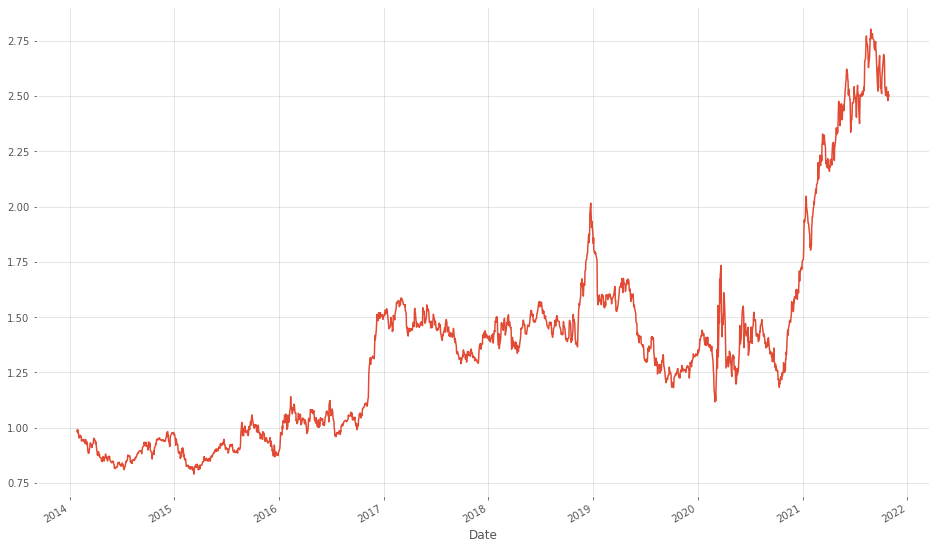

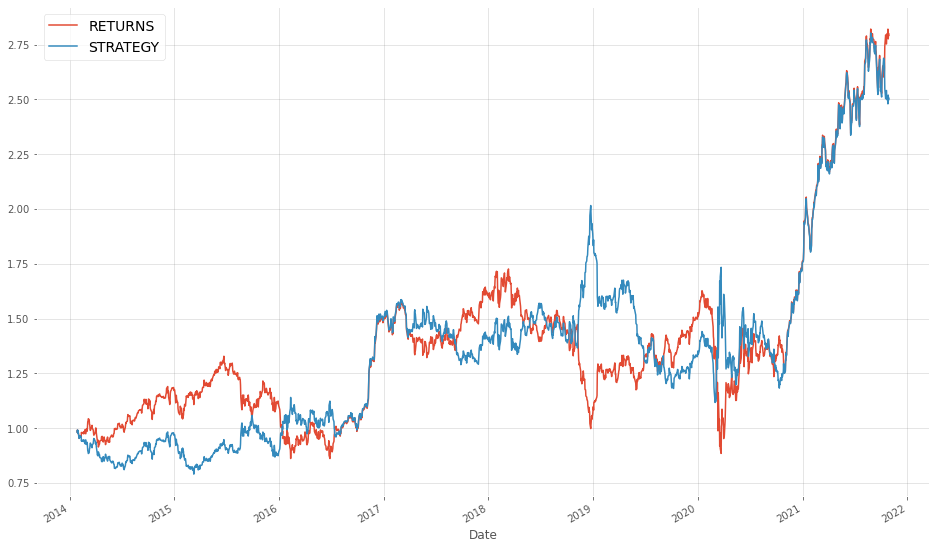

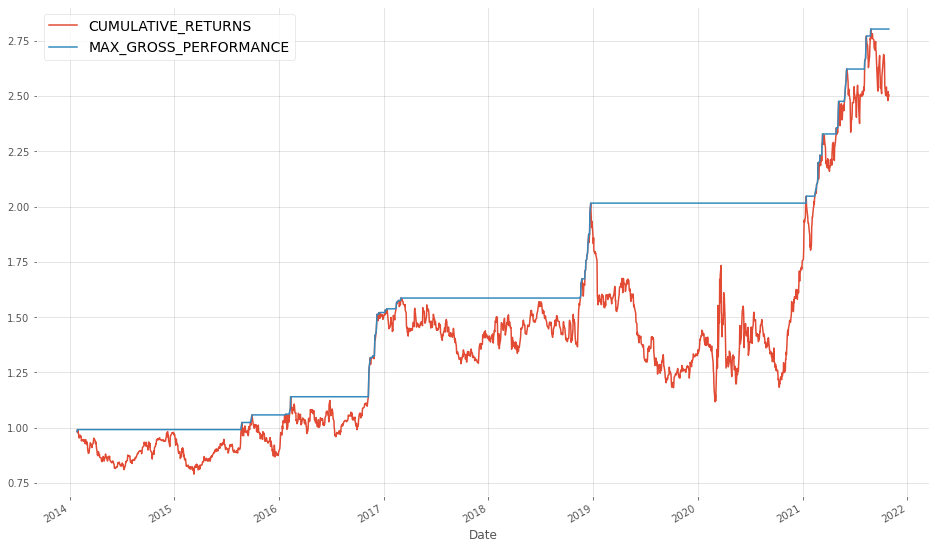

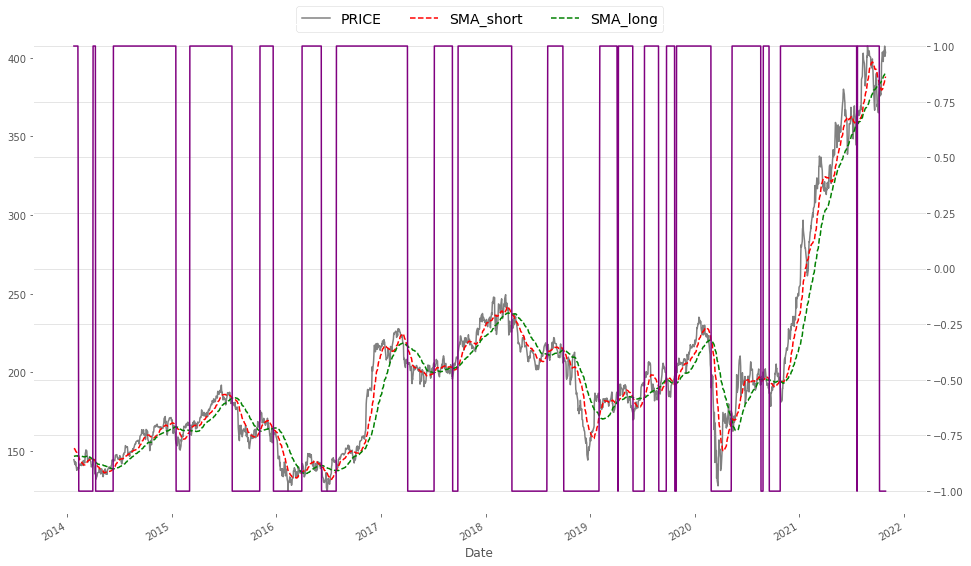

In [35]:
ts_momentum(GS,24,58)

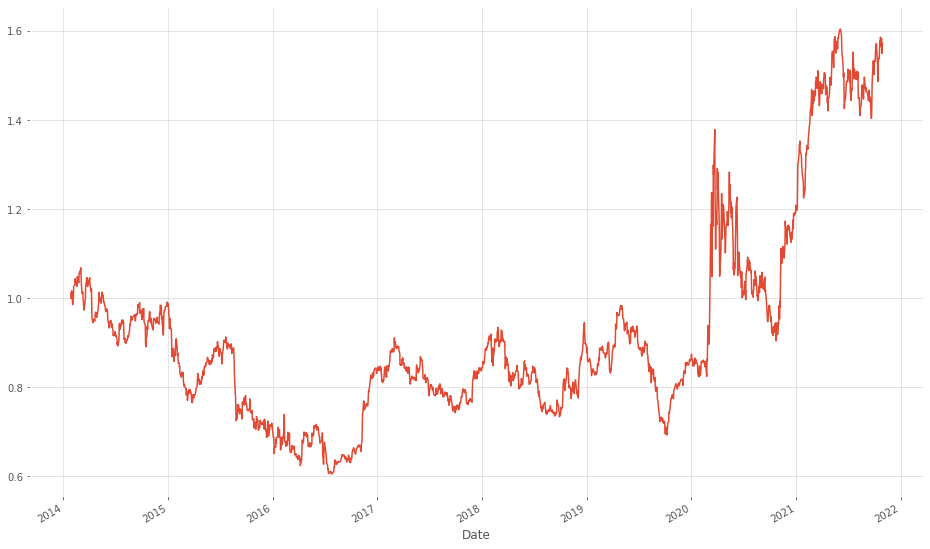

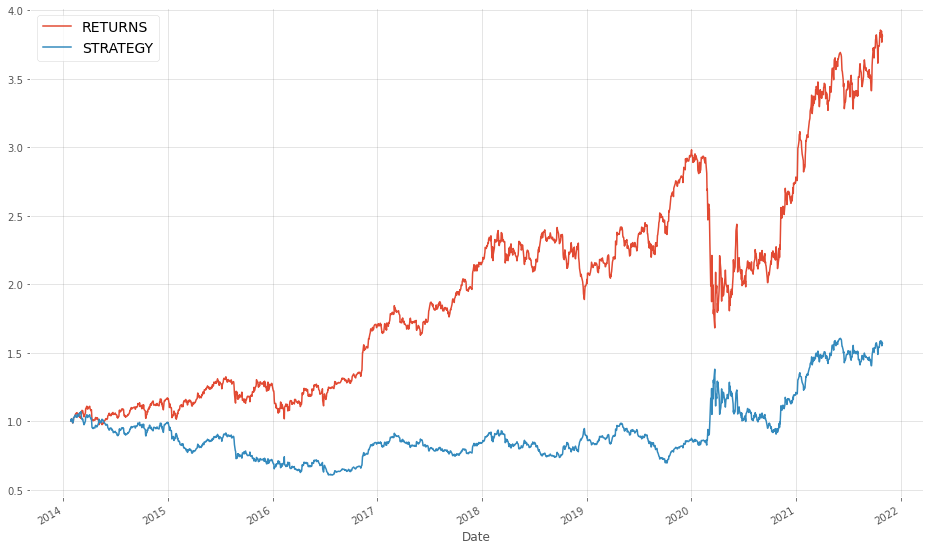

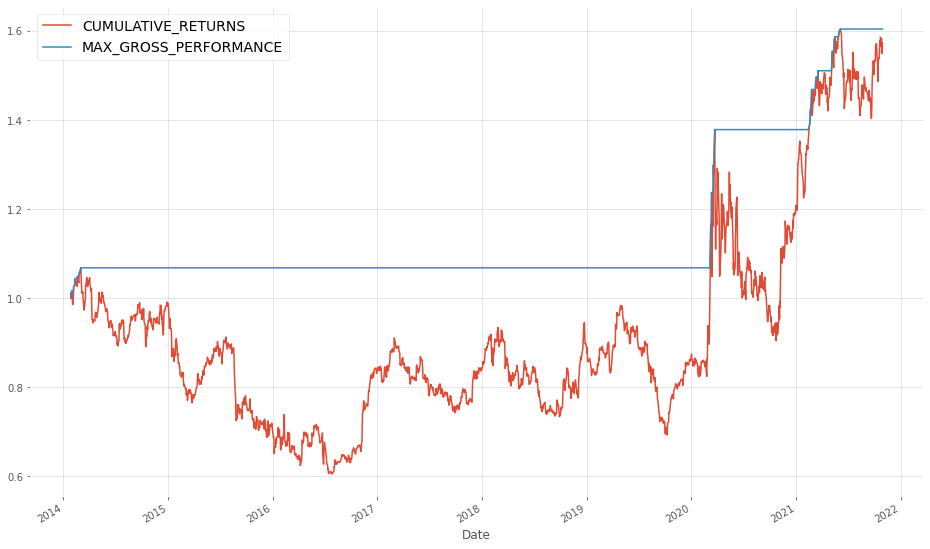

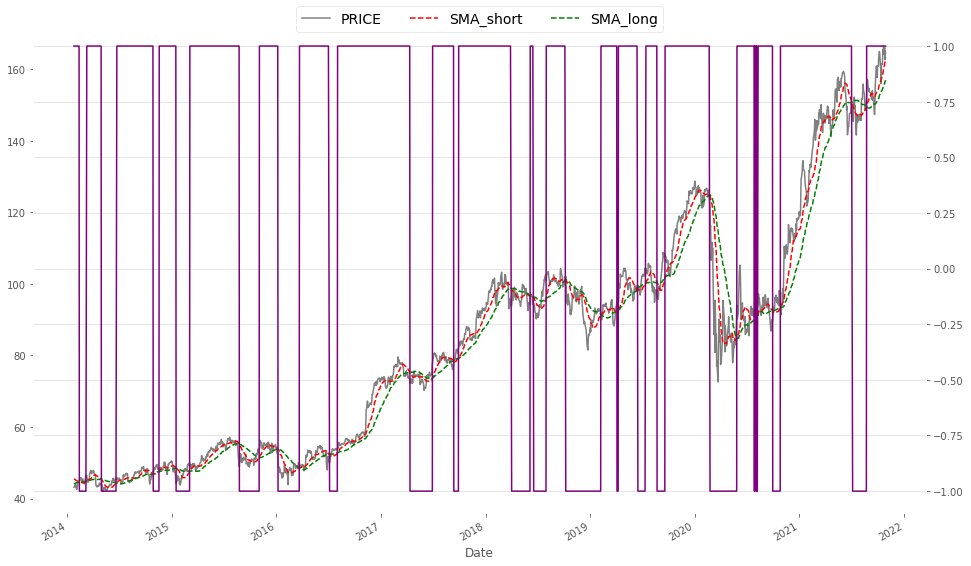

In [36]:
ts_momentum(JPM,24,58)

### <font color = red> Answer 5 (`visualization component`) is presented in the cell below: </font>

In [37]:
def max_drawdown(df):
    # DRAWDOWN as a pd.Series to collect all drawdowns
    DRAWDOWN = (df["MAX_GROSS_PERFORMANCE"] - df["CUMULATIVE_RETURNS"]) / df["MAX_GROSS_PERFORMANCE"]
    
    PERIOD = (DRAWDOWN[DRAWDOWN == 0].index[1:].to_pydatetime() - 
            DRAWDOWN[DRAWDOWN == 0].index[:-1].to_pydatetime()
            )

    return DRAWDOWN.max(), PERIOD.max()

### <font color = red> Answer 5 </font>
    
    As to GS,
    
    The maximum drawdown is about -44.575 percentage points.
    The longest drawdown period lasts for 752 days.
    
    As to JPM,
    
    The maximum drawdown is about -43.358 percentage points.
    The longest drawdown period lasts for 2198 days.
    

In [38]:
print("As to GS:")
print("The maximum drawdown is about %.3f percentage points." %(-max_drawdown(GS)[0]*100))
print(f"The longest drawdown period lasts for {str(max_drawdown(GS)[1]).split()[0]} days.")

As to GS:
The maximum drawdown is about -44.575 percentage points.
The longest drawdown period lasts for 752 days.


In [39]:
print("As to JPM:")
print("The maximum drawdown is about %.3f percentage points." %(-max_drawdown(JPM)[0]*100))
print(f"The longest drawdown period lasts for {str(max_drawdown(JPM)[1]).split()[0]} days.")

As to JPM:
The maximum drawdown is about -43.358 percentage points.
The longest drawdown period lasts for 2198 days.


###  <font color = blue> 👉 Question 6. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [40]:
GS['CUMULATIVE_RETURNS'][-1] * 300000

751486.1770413005

In [41]:
GS["STRATEGY"].dropna().cumsum().apply(np.exp).values[-1] * 300000

751486.1770413005

In [42]:
JPM["STRATEGY"].dropna().cumsum().apply(np.exp).values[-1] * 300000

470621.5672781518

In [43]:
GS["STRATEGY"].dropna().cumsum().apply(np.exp).values[-1] * 300000 + JPM["STRATEGY"].dropna().cumsum().apply(np.exp).values[-1] * 300000

1222107.7443194522

### <font color = red> Answer 6 </font>

    The answer is 751486.38(GS) + 470621.75(JPM) = 1222107.85(all).

###  <font color = blue> 👉 Question 7. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [44]:
trading_opp = 0

for i in np.arange(len(GS['POSITIONS'])):
    if (GS['POSITIONS'] * GS['POSITIONS'].shift(1))[i] < 0:
        trading_opp += 1
    
print(f'There are {trading_opp + 1} trading opportunities for GS using Momentum Strategy.')

There are 38 trading opportunities for GS using Momentum Strategy.


In [45]:
trading_opp = 0

for i in np.arange(len(JPM['POSITIONS'])):
    if (JPM['POSITIONS'] * JPM['POSITIONS'].shift(1))[i] < 0:
        trading_opp += 1
    
print(f'There are {trading_opp + 1} trading opportunities for JPM using Momentum Strategy.')

There are 45 trading opportunities for JPM using Momentum Strategy.


## Can we simplify this process?


# <span style="color:red">YES</span>

In [46]:
sum((np.where(GS['POSITIONS'] * GS['POSITIONS'].shift(1)<0, 1, 0))) + 1

38

In [47]:
sum((np.where(JPM['POSITIONS'] * JPM['POSITIONS'].shift(1)<0, 1, 0))) + 1

45

### <font color = red> Answer 7 </font>

    The answer is ____________________________ .

## BACKTESTING
Use `backtesting` to test our time series momentum strategy

In [48]:
!pip install backtesting


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

C:\Users\bryan\anaconda3\lib\site-packages\backtesting\_plotting.py:50: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.



Loading BokehJS ...

In [50]:
# SMA 
# define a customized function
# def SMA(array, n):
#     """Simple Moving Average"""
#     return pd.Series(array).rolling(n).mean()

# import `SMA` 
from backtesting.test import SMA

In [51]:
# Let's build our test strategy
class SmaCross(Strategy):
    window1 = 24
    window2 = 58

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.window1)
        self.sma2 = self.I(SMA, close, self.window2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()

In [52]:
GS = yf.download("GS",
                start = "2013-11-01",
                end = "2021-10-31",
                auto_adjust = True,
                progress = False)

In [53]:
GS

Open        High         Low       Close   Volume
Date                                                               
2013-10-31  139.208155  140.290292  138.151794  138.151794  2785000
2013-11-01  138.297739  139.646112  138.031504  139.173752  2738400
2013-11-04  139.491535  140.195783  138.778702  140.127075  1711000
2013-11-05  138.847434  139.671919  138.083074  139.087906  2529400
2013-11-06  139.586046  141.106183  139.414282  140.436295  3593700
...                ...         ...         ...         ...      ...
2021-10-25  406.028096  409.227855  403.160016  404.603821  1824700
2021-10-26  406.184204  409.540052  403.638067  407.393860  1843300
2021-10-27  406.359741  407.832811  400.506522  400.935760  2067200
2021-10-28  401.921068  404.769648  399.052988  404.672089  1444700
2021-10-29  403.891660  405.784204  401.121140  403.238068  2061700

[2014 rows x 5 columns]

In [54]:
bt_GS = Backtest(GS, 
                 SmaCross, 
                 cash=300000, 
                exclusive_orders = True)


In [55]:
Backtest?

In [56]:
output = bt_GS.run()
bt_GS.plot()

Row(id='1450', ...)

In [57]:
output

Start                     2013-10-31 00:00:00
End                       2021-10-29 00:00:00
Duration                   2920 days 00:00:00
Exposure Time [%]                   96.573982
Equity Final [$]                675827.724597
Equity Peak [$]                 759212.195175
Return [%]                         125.275908
Buy & Hold Return [%]              191.880442
Return (Ann.) [%]                   10.696306
Volatility (Ann.) [%]               28.678103
Sharpe Ratio                         0.372978
Sortino Ratio                        0.625263
Calmar Ratio                         0.244456
Max. Drawdown [%]                  -43.755535
Avg. Drawdown [%]                   -6.698482
Max. Drawdown Duration      750 days 00:00:00
Avg. Drawdown Duration       86 days 00:00:00
# Trades                                   37
Win Rate [%]                        40.540541
Best Trade [%]                      97.098348
Worst Trade [%]                    -13.483765
Avg. Trade [%]                    

## 👇 Questions 8 and 10 ask you to predict future market direction. Let's analyze `GE`.

###  <font color = blue> 👉 Question 8. </font> 

### Here, first, predict tomorrow’s index level given the index level of today, yesterday, the day before yesterday—namely, three lags.

### Then, also predict tomorrow’s index level, using 30 lags.  <font color = blue> Choose between the two lags that give you better prediction results for your answer to this question</font>.

### Use `scikit-learn` module with solver `lbfgs`, setting `C` at `1e7`, `max_iter` at `1000`.

### Plot the gross performance of the base instrument and the strategy over time (in-sample, no transaction costs).

### Below are the lines of code that lead to an answer:

# LOGISTIC REGRESSION
 > Logistic model (or logit model) is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables.

> As for *Binary variables*, the formula of Logsitic function is:
$$
f(x) = \frac{1}{1+e^{-x}}
$$
$$
\theta^{T}X = \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{k}x_{k} 
$$
$$
p = \frac{1}{1+e^{-\theta^{T}X+b}}
$$

> So we have $P(y=1)=p$, and $P(y=0)=(1-p)$. If $P(y=1)>0.5$ so the estimation will be 1.

> `odds ratio`
$$
odds = \frac{p}{1-p}
$$

> Estimation
- `Loss Function` to estiamte parameters 
- `Solvers`

In [58]:
# get data
GE = pdr.get_data_yahoo("GE",   # ticker name 
                          start = dt.datetime(2013, 11, 1),     # start date
                          end = dt.datetime(2021, 10, 31)       # end date
                         )
# In this question, we use the same time period as last question

# take a look at data
GE

High         Low        Open       Close      Volume  \
Date                                                                     
2013-10-31  203.384613  200.923080  202.692307  201.076920   5570825.0   
2013-11-01  204.923080  200.230774  200.384613  204.153839   7232485.0   
2013-11-04  204.538467  202.384613  204.538467  203.307693   3661593.0   
2013-11-05  204.000000  202.000000  202.461533  203.230774   3236675.0   
2013-11-06  207.538467  203.461533  203.615387  206.923080   7625644.0   
...                ...         ...         ...         ...         ...   
2021-10-25  105.989998  103.330002  103.639999  105.300003   6496200.0   
2021-10-26  110.970001  105.220001  105.760002  107.440002  11701000.0   
2021-10-27  108.279999  103.690002  107.879997  103.849998   8984300.0   
2021-10-28  105.379997  103.099998  103.389999  105.260002   5910800.0   
2021-10-29  105.239998  104.120003  104.949997  104.870003   5618700.0   

             Adj Close  
Date                    
2013-10-31  167.251984  
2013-11-01  169.811325  
2013-11-04  169.107483  
2013-11-05  169.043488  
2013-11-06  172.114670  
...                ...  
2021-10-25  104.857986  
2021-10-26  106.988998  
2021-10-27  103.414062  
2021-10-28  104.818146  
2021-10-29  104.429794  

[2014 rows x 6 columns]

In [59]:
# import necessary packages
from sklearn import linear_model    # 
from sklearn.metrics import accuracy_score  # 
import random   # random 

In [60]:
# define a function to set random seed
def setting_seed(seed = 100):   # input `seed` suppose to be an integer, the default value is 100
    random.seed(seed)       # set seed for `random` package
    np.random.seed(seed)    # set seed for `numpy` package

setting_seed(627)   # set 627 as the experimental random seed

# setting_seed()    # no input value to use default value 100

In [61]:
# calculate log return
GE["RETURNS"] = np.log(GE["Close"] / GE["Close"].shift(1)
                        )
# drop Nan and save
GE.dropna(inplace = True)

GE1 = GE.copy()

In [62]:
# use 3 lag terms
lags = 3

# creat a list `cols` to contain all lag terms column names
cols = []

# use for loop to get all lag values
for lag in range(1, lags +1):
    col = "lag_{}".format(lag)
    GE[col] = GE["RETURNS"].shift(lag)
    cols.append(col)            # store all lag column names, will be used in future 
    
GE.dropna(inplace = True)  

In [63]:
M = linear_model.LogisticRegression(solver = "lbfgs",
                                    C = 1e7,
                                    multi_class = "auto",
                                    max_iter = 1000)

In [64]:
M.fit(GE[cols],
     np.sign(GE["RETURNS"]      # The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0.
            )
     )

LogisticRegression(C=10000000.0, max_iter=1000)

In [65]:
GE['PREDICTION_3'] = M.predict(GE[cols]
                            )

In [66]:
GE['PREDICTION_3'].value_counts()

-1.0    1665
 1.0     345
Name: PREDICTION_3, dtype: int64

In [67]:
GE['STRATEGY_3'] = GE['PREDICTION_3'] * GE['RETURNS']       # predict `1`, buy; `-1`, sell

<AxesSubplot:xlabel='Date'>

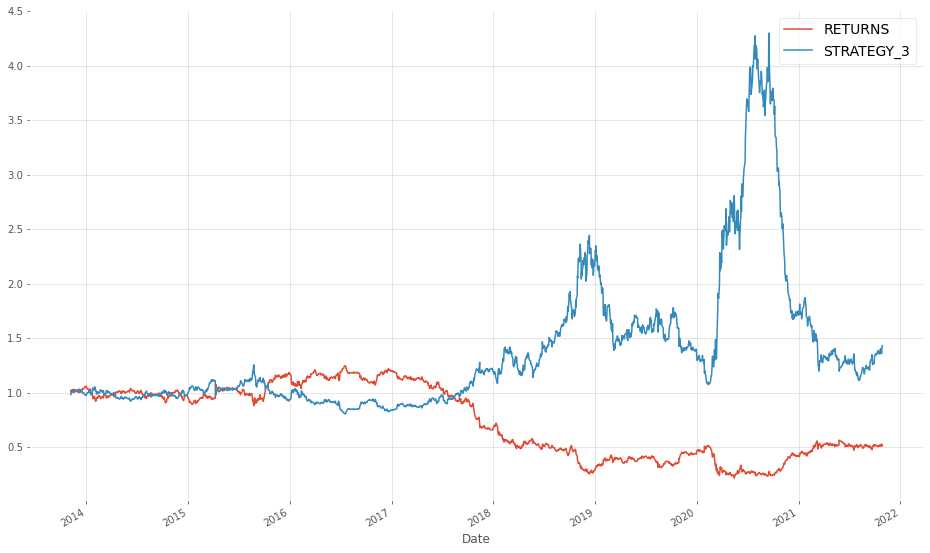

In [68]:
GE[['RETURNS', 
    'STRATEGY_3']].cumsum().apply(np.exp).plot(figsize = (16, 10)
                                                 )

In [69]:
# use 30 lag terms
lags = 30

# creat a list `cols` to contain all lag terms column names
cols = []

# use for loop to get all lag values
for lag in range(1, lags +1):
    col = "lag_{}".format(lag)
    GE[col] = GE["RETURNS"].shift(lag)
    cols.append(col)            # store all lag column names, will be used in future 
    
GE.dropna(inplace = True)  

<AxesSubplot:xlabel='Date'>

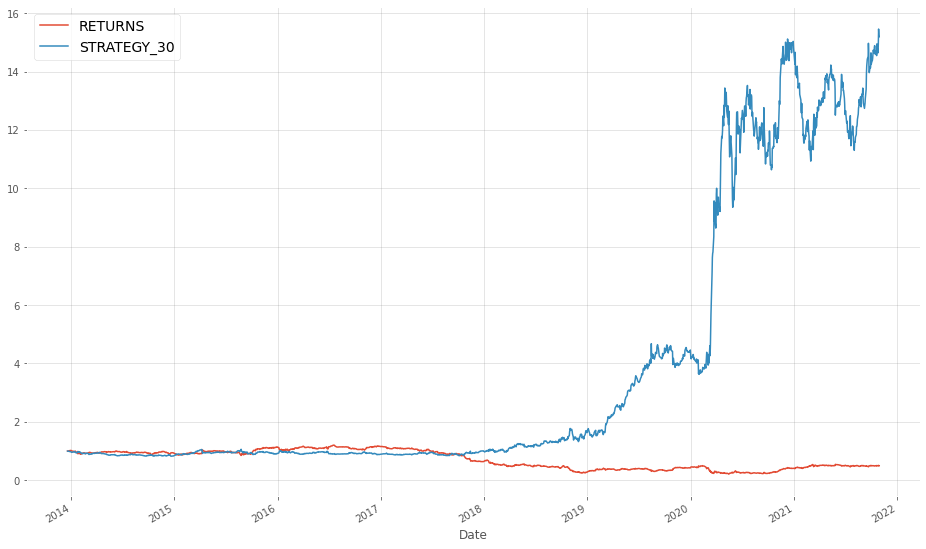

In [70]:
M = linear_model.LogisticRegression(solver = "lbfgs",
                                    C = 1e7,
                                    multi_class = "auto",
                                    max_iter = 1000)

M.fit(GE[cols],
     np.sign(GE["RETURNS"])
     )

GE['PREDICTION_30'] = M.predict(GE[cols]
                            )

GE['STRATEGY_30'] = GE['PREDICTION_30'] * GE['RETURNS']          

GE[['RETURNS', 
    'STRATEGY_30']].cumsum().apply(np.exp).plot(figsize = (16, 10)
                                                 )

<AxesSubplot:xlabel='Date'>

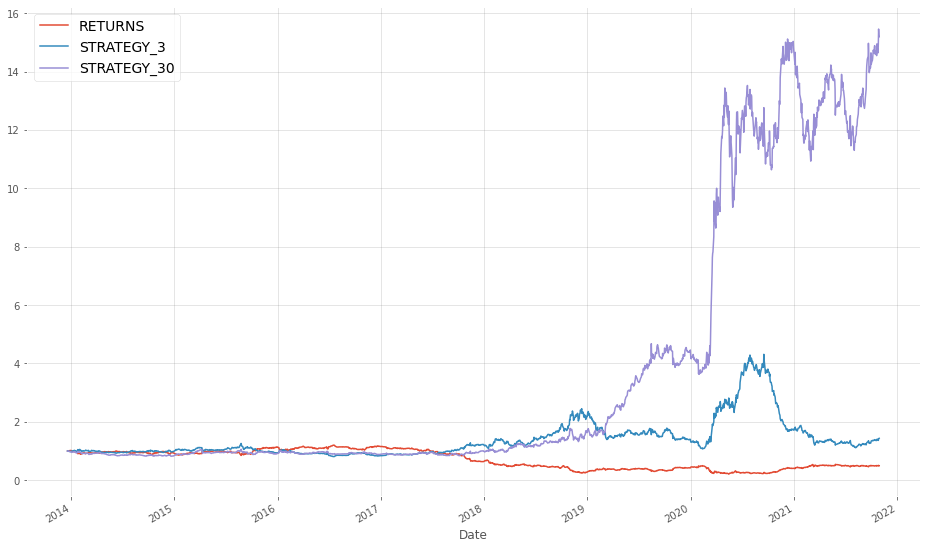

In [71]:
GE[['RETURNS', 
    'STRATEGY_3', 
    'STRATEGY_30']].cumsum().apply(np.exp).plot(figsize = (16, 10)
                                                 )

In [72]:
GE

High         Low        Open       Close      Volume  \
Date                                                                     
2013-12-19  210.769226  206.384613  209.000000  210.153839   6595667.0   
2013-12-20  211.307693  207.846161  209.769226  210.461533  10160124.0   
2013-12-23  211.461533  209.769226  211.000000  210.769226   3887442.0   
2013-12-24  212.769226  210.461533  210.615387  212.384613   1964261.0   
2013-12-26  215.076920  212.307693  212.923080  214.076920   3219489.0   
...                ...         ...         ...         ...         ...   
2021-10-25  105.989998  103.330002  103.639999  105.300003   6496200.0   
2021-10-26  110.970001  105.220001  105.760002  107.440002  11701000.0   
2021-10-27  108.279999  103.690002  107.879997  103.849998   8984300.0   
2021-10-28  105.379997  103.099998  103.389999  105.260002   5910800.0   
2021-10-29  105.239998  104.120003  104.949997  104.870003   5618700.0   

             Adj Close   RETURNS     lag_1     lag_2     lag_3  ...    lag_23  \
Date                                                            ...             
2013-12-19  176.216293 -0.003289  0.013961  0.001851  0.005203  ...  0.007751   
2013-12-20  176.474335  0.001463 -0.003289  0.013961  0.001851  ...  0.000735   
2013-12-23  176.732376  0.001461  0.001463 -0.003289  0.013961  ... -0.007005   
2013-12-24  178.086838  0.007635  0.001461  0.001463 -0.003289  ... -0.002593   
2013-12-26  179.505890  0.007937  0.007635  0.001461  0.001463  ... -0.001856   
...                ...       ...       ...       ...       ...  ...       ...   
2021-10-25  104.857986  0.011942  0.008687 -0.027255  0.012053  ...  0.017609   
2021-10-26  106.988998  0.020119  0.011942  0.008687 -0.027255  ...  0.043878   
2021-10-27  103.414062 -0.033985  0.020119  0.011942  0.008687  ...  0.008125   
2021-10-28  104.818146  0.013486 -0.033985  0.020119  0.011942  ...  0.014822   
2021-10-29  104.429794 -0.003712  0.013486 -0.033985  0.020119  ...  0.003601   

              lag_24    lag_25    lag_26    lag_27    lag_28    lag_29  \
Date                                                                     
2013-12-19 -0.005911  0.003690  0.001480 -0.001480  0.016776 -0.011215   
2013-12-20  0.007751 -0.005911  0.003690  0.001480 -0.001480  0.016776   
2013-12-23  0.000735  0.007751 -0.005911  0.003690  0.001480 -0.001480   
2013-12-24 -0.007005  0.000735  0.007751 -0.005911  0.003690  0.001480   
2013-12-26 -0.002593 -0.007005  0.000735  0.007751 -0.005911  0.003690   
...              ...       ...       ...       ...       ...       ...   
2021-10-25 -0.030415 -0.006591 -0.008622 -0.008059  0.017577 -0.039841   
2021-10-26  0.017609 -0.030415 -0.006591 -0.008622 -0.008059  0.017577   
2021-10-27  0.043878  0.017609 -0.030415 -0.006591 -0.008622 -0.008059   
2021-10-28  0.008125  0.043878  0.017609 -0.030415 -0.006591 -0.008622   
2021-10-29  0.014822  0.008125  0.043878  0.017609 -0.030415 -0.006591   

              lag_30  PREDICTION_30  STRATEGY_30  
Date                                              
2013-12-19  0.018005            1.0    -0.003289  
2013-12-20 -0.011215            1.0     0.001463  
2013-12-23  0.016776           -1.0    -0.001461  
2013-12-24 -0.001480           -1.0    -0.007635  
2013-12-26  0.001480           -1.0    -0.007937  
...              ...            ...          ...  
2021-10-25  0.023831           -1.0    -0.011942  
2021-10-26 -0.039841            1.0     0.020119  
2021-10-27  0.017577           -1.0     0.033985  
2021-10-28 -0.008059           -1.0    -0.013486  
2021-10-29 -0.008622            1.0    -0.003712  

[1980 rows x 41 columns]

In [73]:
# define a function to rearrange all data 
def LAG(df,lags_list):
    '''
    Function `LAG` can run a logistic regression use all lag values to fit a Logistic regression model to predict the market direction.
    The input should be a cleaned DataFrame contains necessary data and a list contains all lags.
    '''
    
    cols = []       # creat a list to collect all (lag) columns name 

    # creat a name list to contain all wanted columns names for final strategy return plotting
    name_list = ["RETURNS"]
    
    accuracy_list = []  # collect all accuracy
    
    accuracy_score_list= []    # collect all accuracy score (calculated by accuracy_score)

    max_lags = max(lags_list)      # get the max lags in lags_list
    print(max_lags)

    # use for loop to deal with all lag values
    # for lags in lags_list:      # because the input of this function is a list, so we neeed to sepreately use different lags

    for lag_i in range(1, max_lags+1):       # raneg(1, max_lags+1) = a range 1 to max_lags, same step=1 as default, day must be int
        col = "lag_{}".format(lag_i)      # col name is a string, lag_1 for lags=1, lag_2 for lags=2, using this step to
                                        # distinguish all different lag value columns
        df[col] = df["RETURNS"].shift(lag_i)       # .shift()
        cols.append(col)                # add a col name in the cols

    df.dropna(inplace=True)

    for lags in lags_list:
        print("START PREDICT WITH LAG" + str(lags))
        cols_1 = [col for col in cols[:(lags)]]       # cols_1 is designed to collect lags name for each lag groups
        # in this script, we need to test two lags(3,30), so cols_1 may contain RETURN and lag_1,2,3
        print(cols_1)
        # build a Logistic regression 
        # set parameters as requirements
        M = linear_model.LogisticRegression(solver = "lbfgs",       # slover is an algorithm to use in the optimization problem. 'lbfgs'--L2
                                            C = 1e7,                # inverse of regularization strength，related with the penalty. C derease, strength increase
                                            multi_class = "auto",   # {‘auto’, ‘ovr’, ‘multinomial’}
                                            max_iter = 1000)        # maximum number of iterations taken for the solvers to converge.
        # give lag value(independent variables,x) and market direction(dependent variable,y) to this model
        
        # fit this model
        M.fit(df[cols_1],     
            np.sign(df["RETURNS"]        # np.sign()
                    )
                    )

        df["PREDICTION"+str(lags)] = M.predict(df[cols_1]
                                    )

        # print(df["PREDICTION"+str(lags)].value_counts())

        accuracy = np.sign(df["RETURNS"].iloc[lags:] * 
                        df["PREDICTION"+str(lags)].iloc[lags:]
                        ).value_counts()

        accuracy_list.append(accuracy)

        accur_score = accuracy_score(np.sign(df["RETURNS"]),  # y_real
                                       df["PREDICTION"+str(lags)]    # y_predict
                                        )

        accuracy_score_list.append(accur_score)

        #print("The lag is " + str(lags))
        #print(accur_score)
    
        df["STRATEGY"+str(lags)] = df["PREDICTION"+str(lags)] * df["RETURNS"]  # strategy return

        # print(df[["RETURNS", "STRATEGY"+str(lags)]
        #     ].cumsum().apply(np.exp))
        
        name_list.append("STRATEGY"+str(lags))

        print("FINISH PREDICT WITH LAG" + str(lags))
        print("---------------------------------------------------------------")

    df[name_list].cumsum().apply(np.exp).plot(figsize = (16, 10))

    return  accuracy_list, accuracy_score_list

30
START PREDICT WITH LAG3
['lag_1', 'lag_2', 'lag_3']
FINISH PREDICT WITH LAG3
---------------------------------------------------------------
START PREDICT WITH LAG30
['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30']
FINISH PREDICT WITH LAG30
---------------------------------------------------------------


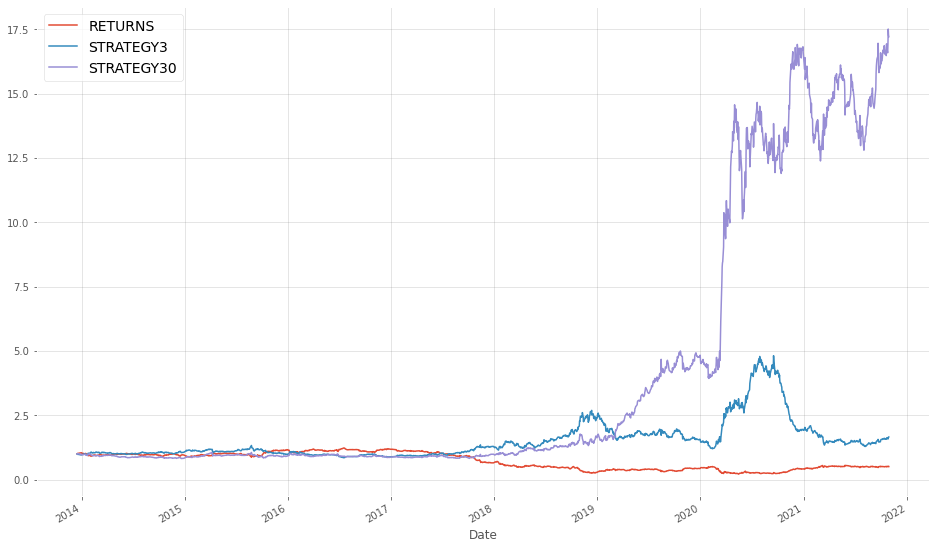

In [74]:
lag_list = [3,30]
accuracy, accuracy_score_list = LAG(GE1,lag_list)

In [75]:
GE1

High         Low        Open       Close      Volume  \
Date                                                                     
2013-12-16  208.384613  206.692307  207.230774  207.538467   5220800.0   
2013-12-17  208.769226  207.230774  208.461533  207.923080   4762238.0   
2013-12-18  211.307693  206.461533  207.923080  210.846161   7184944.0   
2013-12-19  210.769226  206.384613  209.000000  210.153839   6595667.0   
2013-12-20  211.307693  207.846161  209.769226  210.461533  10160124.0   
...                ...         ...         ...         ...         ...   
2021-10-25  105.989998  103.330002  103.639999  105.300003   6496200.0   
2021-10-26  110.970001  105.220001  105.760002  107.440002  11701000.0   
2021-10-27  108.279999  103.690002  107.879997  103.849998   8984300.0   
2021-10-28  105.379997  103.099998  103.389999  105.260002   5910800.0   
2021-10-29  105.239998  104.120003  104.949997  104.870003   5618700.0   

             Adj Close   RETURNS     lag_1     lag_2     lag_3  ...    lag_25  \
Date                                                            ...             
2013-12-16  172.626541  0.005203  0.011240 -0.001506 -0.020850  ...  0.016776   
2013-12-17  172.946472  0.001851  0.005203  0.011240 -0.001506  ... -0.001480   
2013-12-18  175.377808  0.013961  0.001851  0.005203  0.011240  ...  0.001480   
2013-12-19  176.216293 -0.003289  0.013961  0.001851  0.005203  ...  0.003690   
2013-12-20  176.474335  0.001463 -0.003289  0.013961  0.001851  ... -0.005911   
...                ...       ...       ...       ...       ...  ...       ...   
2021-10-25  104.857986  0.011942  0.008687 -0.027255  0.012053  ... -0.006591   
2021-10-26  106.988998  0.020119  0.011942  0.008687 -0.027255  ... -0.030415   
2021-10-27  103.414062 -0.033985  0.020119  0.011942  0.008687  ...  0.017609   
2021-10-28  104.818146  0.013486 -0.033985  0.020119  0.011942  ...  0.043878   
2021-10-29  104.429794 -0.003712  0.013486 -0.033985  0.020119  ...  0.008125   

              lag_26    lag_27    lag_28    lag_29    lag_30  PREDICTION3  \
Date                                                                        
2013-12-16 -0.011215  0.018005 -0.000378 -0.004153  0.015186         -1.0   
2013-12-17  0.016776 -0.011215  0.018005 -0.000378 -0.004153         -1.0   
2013-12-18 -0.001480  0.016776 -0.011215  0.018005 -0.000378         -1.0   
2013-12-19  0.001480 -0.001480  0.016776 -0.011215  0.018005         -1.0   
2013-12-20  0.003690  0.001480 -0.001480  0.016776 -0.011215         -1.0   
...              ...       ...       ...       ...       ...          ...   
2021-10-25 -0.008622 -0.008059  0.017577 -0.039841  0.023831         -1.0   
2021-10-26 -0.006591 -0.008622 -0.008059  0.017577 -0.039841         -1.0   
2021-10-27 -0.030415 -0.006591 -0.008622 -0.008059  0.017577         -1.0   
2021-10-28  0.017609 -0.030415 -0.006591 -0.008622 -0.008059          1.0   
2021-10-29  0.043878  0.017609 -0.030415 -0.006591 -0.008622         -1.0   

            STRATEGY3  PREDICTION30  STRATEGY30  
Date                                             
2013-12-16  -0.005203          -1.0   -0.005203  
2013-12-17  -0.001851          -1.0   -0.001851  
2013-12-18  -0.013961           1.0    0.013961  
2013-12-19   0.003289           1.0   -0.003289  
2013-12-20  -0.001463           1.0    0.001463  
...               ...           ...         ...  
2021-10-25  -0.011942          -1.0   -0.011942  
2021-10-26  -0.020119           1.0    0.020119  
2021-10-27   0.033985          -1.0    0.033985  
2021-10-28   0.013486          -1.0   -0.013486  
2021-10-29   0.003712           1.0   -0.003712  

[1983 rows x 41 columns]

### <font color = red> Answer 8 </font>

    The answer is ____________________________ .

###  <font color = blue> 👉 Question 9. </font> Now let's come up with performance metrics of accuracy.

### Below are the lines of code that lead to an answer:

In [76]:
for i in range(len(lag_list)):
    print("The prediction result of lag {} is:".format(lag_list[i]))
    print(accuracy[i],2)
    print("The accuracy rate of lag {} is:".format(lag_list[i]))
    print(round(accuracy_score_list[i]*100,2))

The prediction result of lag 3 is:
 1.0    1013
-1.0     937
 0.0      30
dtype: int64 2
The accuracy rate of lag 3 is:
51.08
The prediction result of lag 30 is:
 1.0    1045
-1.0     879
 0.0      29
dtype: int64 2
The accuracy rate of lag 30 is:
53.3


### <font color = red> Answer 9 </font>
    Here, the prediction is _____ times correct and _____ wrong. The accuracy is ______ %.

###  <font color = blue> 👉 Question 10. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [77]:
GE["STRATEGY_3"].mean() / GE["STRATEGY_3"].std() * np.sqrt(252)

0.13187593082817872

In [78]:
GE["STRATEGY_30"].mean() / GE["STRATEGY_30"].std() * np.sqrt(252)

0.9942993280861159

### <font color = red> Answer 10 </font>

    Classification algorithm-based strategy for GE leads to a Sharpe ratio of __________ .

# Looks nice! 

# BUT

# Is that reliable?

# <font color = red> NO </font>

## <font color = blue> Somenotes: </font>
### **Limitation** of this strategy
> Traning and testing set
- `train_test_split` in `sklearn`
- traning, validation, testing set
- **CV---Cross Validation**

### Other classification methods 
- SVM, Navie Bayes, Decision Tree ...

# CONCLUSION
## Mean-reversion strategy
> Build function to draw Bollinger bands

> *Plotting* with `cufflinks` and `plotly`

## Timeseries momentum strategy
> function with three input (data, short_window, long_window)

> `Backtesting`

## Return direction prediction based strategy
> *`Logistic Regression`* for `Classification`  

##  <font color = red> ***FUNCTION*** </font>
##  <font color = red> ***GENERIC AND TUNABLE*** </font>

# ***THANKS FOR YOUR LISTENING***